http://blog.csdn.net/wmn7q/article/details/52662064

【回归分析】[2]--线性回归和最小二乘法
 
 <img src="files/ols_explain.png">

In [3]:
# coding:utf-8

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

X = np.arange(-10,11)
Y = 50-np.square(X)
# print (X,'\n',Y)

# plt.plot(X, Y)
import statsmodels.api as sm
# Statsmodels 统计包
# https://zhuanlan.zhihu.com/p/22692029
# statsmodels.OLS 的输入有 (endog, exog, missing, hasconst) 
# 第一个输入 endog 是回归中的反应变量（也称因变量），第二个输入 exog 则是回归变量（也称自变量）的值，
# 但是要注意，statsmodels.OLS 不会假设回归模型有常数项
# Statmodels 有直接解决这个问题的函数：sm.add_constant()。它会在一个 array 左侧加上一列 1
X_with_one = sm.add_constant(X)
model = sm.OLS(Y,X_with_one)
results = model.fit()
print(results.params)
print(results.summary())

[  1.33333333e+01  -5.55111512e-17]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.053
Method:                 Least Squares   F-statistic:                -3.081e-15
Date:                Fri, 19 May 2017   Prob (F-statistic):               1.00
Time:                        17:31:45   Log-Likelihood:                -103.02
No. Observations:                  21   AIC:                             210.0
Df Residuals:                      19   BIC:                             212.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13

[  0.8943177   10.00166585]
10.0016658485


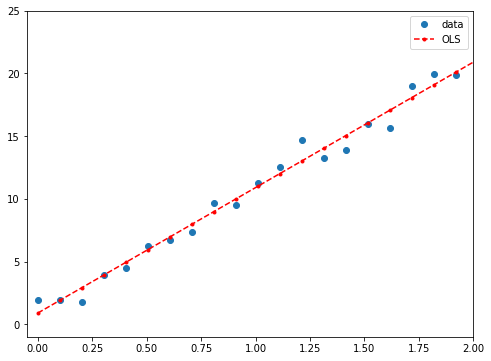

In [16]:
import statsmodels.api as sm
# Say Y = 1 + 10*X
nsample = 100
x = np.linspace(0, 10, nsample)
X = sm.add_constant(x)
beta = np.array([1, 10])
e = np.random.normal(size=nsample)
y = np.dot(X, beta) + e
model = sm.OLS(y,X)
results = model.fit()
print(results.params)
# print(results.summary())
# 中间偏下的 coef 列就是计算出的回归系数
y_fitted = results.fittedvalues
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label='data')
ax.plot(x, y_fitted, 'r--.',label='OLS')
ax.legend(loc='best')
ax.axis((-0.05, 2, -1, 25))

# 验证一下Beta是 Cov(Y,X)/Var(X)
# cov_x_y = sum((x-np.mean(x))*(y-np.mean(y)) )/x.size
# print ( np.cov(x,y, bias=True)[0][1],cov_x_y  )
print(np.cov(x,y, bias=True)[0][1]/np.var(x))

[ 0.89714322  0.14130736  9.9983252 ]


(-0.05, 2, -1, 25)

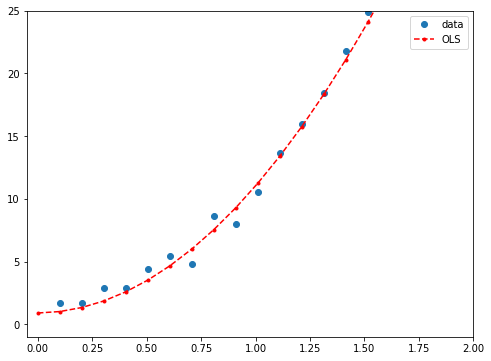

In [5]:
# 高次模型的回归
# Say Y = 1 + 0.1*X + 10*X^2
nsample = 100
x = np.linspace(0, 10, nsample)
X = np.column_stack((x, x**2))
X = sm.add_constant(X)
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)
y = np.dot(X, beta) + e
model = sm.OLS(y,X)
results = model.fit()
print(results.params)
# print(results.summary())
# 中间偏下的 coef 列就是计算出的回归系数
y_fitted = results.fittedvalues
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label='data')
ax.plot(x, y_fitted, 'r--.',label='OLS')
ax.legend(loc='best')
ax.axis((-0.05, 2, -1, 25))

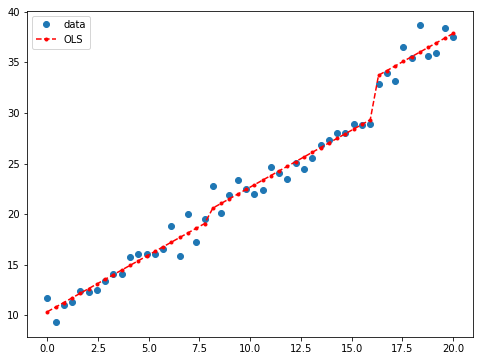

In [6]:
# 哑变量
# 我们需要将分类变量转化为哑变量(dummy variable)
# 如果我们想表达一个有 d 种取值的分类变量，那么它所对应的哑变量的取值是一个 d 元组
# （可以看成一个长度为 d 的向量），其中有一个元素为 1，其他都是 0。
# 某个分类变量的取值是 {a,b,c,d}，那么类别 a 对应的哑变量是(1,0,0,0)，
# b 对应 (0,1,0,0)，c 对应 (0,0,1,0)，d 对应 (0,0,0,1)。
# Statsmodels 里有一个函数 categorical() 可以直接把类别 {0,1,…,d-1} 转换成所对应的元组。
# sm.categorical() 的输入有 (data, col, dictnames, drop) 四个
# data 是一个 k×1 或 k×2 的 array，其中记录每一个样本的分类变量取值
# drop 是一个 Bool值，意义为是否在输出中丢掉样本变量的值
# 这个函数的输出是一个k×d 的 array（如果 drop=False，则是k×(d+1)），
# 其中每一行是所对应的样本的哑变量；这里 d 是 data 中分类变量的类别总数。
# Say, Y = 10 + 1 * X + Z_1 + 3*Z_2 + 8*Z_3

nsample = 50
# 设定分类变量的 array。前 20 个样本分类为 a。之后的 20 个样本分类为 b。最后 10 个是 c 类。
groups = np.zeros(nsample, int)
groups[20:40] = 1
groups[40:] = 2
dummy = sm.categorical(groups, drop=True)
x = np.linspace(0, 20, nsample)
# print(dummy[:5])
    # [[ 1.  0.  0.]
    #  [ 1.  0.  0.]
    #  [ 1.  0.  0.]
    #  [ 1.  0.  0.]
    #  [ 1.  0.  0.]]
X = np.column_stack((x, dummy))
X = sm.add_constant(X)
# print(X[1])
    # [ 1.          0.40816327  1.          0.          0.        ]
beta = [10, 1, 1, 3, 8]
e = np.random.normal(size=nsample)
y = np.dot(X, beta) + e
result = sm.OLS(y,X).fit()
# print(result.summary())
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label="data")
ax.plot(x, result.fittedvalues, 'r--.', label="OLS")
ax.legend(loc='best')

